# Introduction

## Current state of AI

As one of our godfather papa Andrew says, AI is the new electricity. Why is that ? And what does he mean by "AI" ?

The term was first introduced by John McCarthy in 1956 during the first academic
conference on the subject, where he defined AI as the 
> The study to proceed on the basis of the conjecture that every aspect of learning or any other feature of intelligence can in principle be so precisely described that a machine can be made to simulate it [[1]](https://en.wikipedia.org/wiki/Dartmouth_workshop)

Nowadays, AI is seen more as a sub-field of computer science and how machines can imitate human intelligence [[2]](https://www.lexico.com/definition/artificial_intelligence).

The most preminent subset of AI, machine learning, is basically the **study of computer algorithms that improve automatically through experience**. Machine learning algorithms are divided into categories according to their purpose. 

Among them, **supervised learning** is the one that uses labeled data to approximate a function f that maps inputs x to the most accurate outputs y. It is the one that gets a lot of attention because there are dozens of applications. In fact, regression and classification are the most common problems in the industry. Common algorithms include Decision trees, SVM, linear regression and **Neural network**, which we will focus on.    

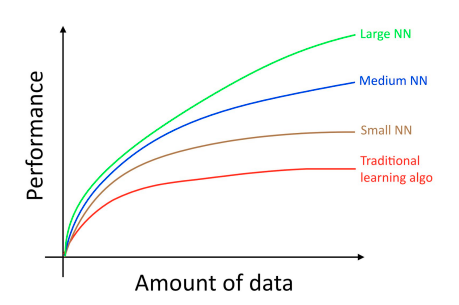


Although a lot of ideas of deep learning have been around for decades, they're only taking of lately because deep learning scales with **data** and **computing power**. Thanks to the digitization of our society, we have access to more and more data and it's also the case for computing power. 
 
This has allowed more research on the subect, leading to new algorithms and new approaches.

## NIPS and a summary of the paper

NeurIPS is the largest AI conference in the world. In december of 2018, among the 4,854 papers submitted 4 received "Best paper" award. The paper we're studying is one of them [[3]](https://arxiv.org/abs/1806.07366). It was published by David Duvenaud and his 3 students Ricky T. Q. Chen, Yulia Rubanova, Jesse Bettencourt who are from the vector institute of the University of Toronto. 
In this paper, a new family of neural network called **neural ODE** is introduced. 

### A quick summary

They basically consider whole network as a continuous function and use ODE to approximate it. Unlike many NN, the number of hidden layers is not discrete and fixed beforehand : the ODE solver determines it. They explain many interesting advantages and aspects of this approach (which we will talk more in details), notably the fact that it could **replace ResNets for computer vision, which outperform human performance on the ImageNet dataset** it we could apply more than a hundred years of theory in ODE to NN. 

Many people in the ML community were quite entusiastic when this paper was realeased as it could allow us to apply more than a hundred years of theory in ODE to neural network. This seems to open up a whole new way of optimizing neural networks. 

Is it truly the case ? What are the approaches and their limits ? 

In this document we will try to give an intuitive approach to this new family of neural network. We will first explain the technical aspects of the approach. We'll then talk about the said advantages. We'll implement the method to common problems. Finally, we'll conclude by giving a critical point of view.    



# Introducing ODE in the context of Deep learning


## Neural network

In this part we introduce the notion of Neural network.

### The basic idea

Neural Networks are built with linear algebra (matrices and matrix operations) and optimized using Calculus (gradient descent and other algorithms). They consist of a series of "layers", which are just matrix operations.


![alt text](https://www.researchgate.net/profile/Facundo_Bre/publication/321259051/figure/fig1/AS:614329250496529@1523478915726/Artificial-neural-network-architecture-ANN-i-h-1-h-2-h-n-o.png) 


For any layer $l$, let $h_{l}$ be it's associated hidden units (i.e activation values) and $n_{l}$ its number of hidden units. the hidden units of the next layer is computed as : 

$$ h_{l+1} = g_{l+1}(W_{l+1}h_{l} + b_{l+1}) $$

where $W_{l+1}\in\mathbb{R}^{n_{l+1}\times{n_{l}}} $, $b_{l+1}\in\mathbb{R}^{n_{l+1}}$ and $g_{l+1}\in\mathbb{R}^{n_{l+1}}$ are respectively the weight matrix, bias and activation function of the $(l+1)^{th}$ layer. Note that the activation must be a non linear function, otherwise it would be equivalent to a one layer NN. Classic activation function include ReLu, tanh, softmax...

Forward propagation is accomplished by computing the values of each layer subsequently and getting the output value $h_L = \hat{y}$, where $L$ is the number of layers. Note that each layer introduces a little bit of **error** that compounds through the network. We can then measure how good our output is when the true label is by computing the loss function $L(y,\hat{y})$. This function is defined beforehand and should ideally be **convex** so that it has a global optimum, making the following minimization problem easier to deal with.

In fact our goal in machine learning is to improve the network's prediction, we want to minimize the loss which can be optimized with respect to the parameters
$(W_{l},b_{l}), \forall l \in [0,L]$. Backpropagation is the process of computing  each of the partial derivatives of the loss with respect to these parameters, also called the **gradients** which indicates us which direction of the parameter induces an increase in the loss function. As the latter depends on a lot of variables, we use iterative methods to update the parameters such as **gradient descent** : 

$$ W_{l} = W_{l} - \alpha \frac{\partial L}{\partial W_{l}} \\ 
   b_{l} = b_{l} - \alpha \frac{\partial L}{\partial b_{l}}  
$$

Where $\alpha$, an hyper-parameter, is the learning rate which influences the optimization's speed and convergence.
Other methods include Momentum, RMSprop, Adam ... [[4]](https://www.deeplearning.ai/ai-notes/optimization/)

We've seen the basic ideas and architecture behind neural network. As we said earlier, a lot of research has been done during the last years leading to new algorithms and neural network architectures.

### How to reduce the compound error ?

![alt text](http://www.ccri.com/wp-content/uploads/2017/05/stackMoreLayers.png)

The first idea that comes to mind in neural network is to make a **bigger model** with more **layers** and **neurons**, because the more complex the most accurate. Note that this has not been possible until recently due to the necessity in computing power.
It obviously turns out that this is not the best approach for all cases but a good rule of thumb is to **increase the number of layers as the problem gets complex.**

![alt text](https://cdn-images-1.medium.com/max/1600/1*EVy3hNSF4Nq7v7bNYOyNcQ.png)

Although they deeply affect the output of the network, we cannot analytically calculate the number of layers or the number of nodes to use per layer in an artificial neural network to address a specific real-world supervised learnign problem. In fact **neural network models are stochastic**, meaning that the same models fit on the same data might give differents answers and have different overall skills.

In practice, we determine these hyper parameters through analysis of experiments and observations. This is one aspect which shows how good a  machine learner is. The experiments must be well thought, the data well chosen and well split. 

The most common way is to divide the data into (Training / Dev(also called validation) / Test) sets. The split depends on the ammount of data at hand, the more we have the more we give to the training set. Note that it is  important to have a test set that comes from **a different distribution** to see if the model generalizes well. Model is then trained and its error rate w.r.t to each set is computed. To put these error in a context we want to approximate the  **optimal error rate (Bayes rate)**, which is the theoretical plateau of performance. In practice, we do that by using **human level accuracy**   

Let us quickly summarize how to analyze the results according to our godfather Andrew NG [[5]](https://www.youtube.com/watch?v=F1ka6a13S9I) :

 ![alt text](https://cdn-images-1.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png)
 
* High train error w.r.t optimal error implies a high biais problem (underfitting). 
    - The solution is to make a bigger model
* High dev error w.r.t train error implies high variance problem (overfitting).
    - The solution is to get more data. We can also add regularizationor simplify the model architecture.
* High test error w.r.t to dev error implies generalization problem. 
    - The solution is to fit more various data to the model.
    
**There is a variance-biais trade off : the idea is to find a good middle ground.**
Andrew NG also introduces a new way to split and approach the problem (close to what we explained) in his talk which we won't be covering here.

We talked about increasing the complexity of the network (i.e number of layers) as the problem get complex but not can it cause high variance problem, it also comes with a well-known problem : **the vanishing gradient**.

The gradient diminishes fast in very deep architectures, so the usual style of backpropagation doesn't work well. Backpropagated errors become very small after a few layers, which makes learning ineffective.


## Residual networks


A solution to this was proposed by Microsoft for the 2015 ImageNet competiton (residual networks)
- In December of  2015, Microsoft proposed "Residual networks" as a solution to the ImageNet Classification Competition
- ResNets had the best accuracy in the competition
- ResNets utilize "skip-connections" between layers, which increases accuracy.
- They were able to train networks of up to 1000 layers deep while avoiding vanishing gradients (lower accuracy)
- 6 months later, their publicatio already had more than 200 references.
- microsoft (citation) introduce this shit, explain basic functionning
- other types of resnet (densenet papa andrew)


## From Resnets to ODE ...



# How does neural ODE work ? 

## Forward propagation

## Backward propagation

## Advantages 


In [ ]:
## Import the Adjoint Method (ODE Solver)
from torchdiffeq import odeint_adjoint as odeint

## Normal Residual Block Example

class ResBlock(nn.Module):

    #init a block - Convolve, pool, activate, repeat
    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(ResBlock, self).__init__()
        self.norm1 = norm(inplanes)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.norm2 = norm(planes)
        self.conv2 = conv3x3(planes, planes)

    #Forward pass - pass output of one layer to the input of the next 
    def forward(self, x):
        shortcut = x
        out = self.relu(self.norm1(x))
        out = self.conv1(out)
        out = self.norm2(out)
        out = self.relu(out)
        out = self.conv2(out)

        return out + shortcut

## Ordinary Differential Equation Definition     

class ODEfunc(nn.Module):

    # init ODE variables
    def __init__(self, dim):
        super(ODEfunc, self).__init__()
        self.norm1 = norm(dim)
        self.relu = nn.ReLU(inplace=True)
        self.conv1 = conv3x3(dim, dim)
        self.norm2 = norm(dim)
        self.conv2 = conv3x3(dim, dim)
        self.norm3 = norm(dim)
        self.nfe = 0

    # init ODE operations 
    def forward(self, t, x):
      #nfe = number of function evaluations per timestep
        self.nfe += 1
        out = self.norm1(x)
        out = self.relu(out)
        out = self.conv1(out)
        out = self.norm2(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.norm3(out)
        return out


 ## ODE block
class ODEBlock(nn.Module):

    #initialized as an ODE Function
    #count the time
    def __init__(self, odefunc):
        super(ODEBlock, self).__init__()
        self.odefunc = odefunc
        self.integration_time = torch.tensor([0, 1]).float()

    #foorward pass 
    #input the ODE function and input data into the ODE Solver (adjoint method)
    # to compute a forward pass
    def forward(self, x):
        self.integration_time = self.integration_time.type_as(x)
        out = odeint(self.odefunc, x, self.integration_time, rtol=args.tol, atol=args.tol)
        return out[1]

    @property
    def nfe(self):
        return self.odefunc.nfe

    @nfe.setter
    def nfe(self, value):
        self.odefunc.nfe = value

## Main Method

if __name__ == '__main__':


    
    #Add Pooling
    downsampling_layers = [
         nn.Conv2d(1, 64, 3, 1),
         ResBlock(64, 64, stride=2, downsample=conv1x1(64, 64, 2)),
         ResBlock(64, 64, stride=2, downsample=conv1x1(64, 64, 2)),
     ]

    # Initialize the network as 1 ODE Block
    feature_layers = [ODEBlock(ODEfunc(64))] 
    # Fully connected Layer at the end
    fc_layers = [norm(64), nn.ReLU(inplace=True), nn.AdaptiveAvgPool2d((1, 1)), Flatten(), nn.Linear(64, 10)]
  
    #The Model consists of an ODE Block, pooling, and a fully connected block at the end
    model = nn.Sequential(*downsampling_layers, *feature_layers, *fc_layers).to(device)

    #Declare Gradient Descent Optimizer
    optimizer = torch.optim.SGD(model.parameters(), lr=args.lr, momentum=0.9)

    #Training Loop
    for itr in range(args.nepochs * batches_per_epoch):

        
        #init the optimizer
        optimizer.zero_grad()
        
        #Generate training data
        x, y = data_gen()
        #Input Training data to model, get Prediction
        logits = model(x)
        #Compute Error using Prediction vs Actual Label
        loss = CrossEntropyLoss(logits, y)
        
        #Backpropagate
        loss.backward()
        optimizer.step()

# NOTES

How it works : 

* the idea is to fix a desired accuracy and letting the model train in that margin of error
Advantages : 

* Can be applied to time-series data (finance data, healthcare data...) and is apparently bette than RNN, which is the state of the art for this type of data
* their ability to predicting outputs of irregular time series data (which NN have trouble dealing with)
* adaptative precision wrt to desired accuracy/ 

limits/ errors : 

vidéo youtube de ricky
https://www.reddit.com/r/MachineLearning/comments/c5xzo1/r_neural_odes/ : adaptative solvers controls error for a given step size, but that doesn't make an ODE stable if the said ODE is unstable for any given step size

What’s next?
It’s clear, that Neural ODEs are designed to learn relatively simple processes (that’s why we even have ordinary in the title), so we need a 
